In [1]:
from google.colab import files
uploaded = files.upload()  # This opens a file upload dialog


Saving Churn.csv to Churn.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Data
df = pd.read_csv("Churn.csv")

# Preprocessing
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)
df_encoded = pd.get_dummies(df.drop(['Customer ID', 'Churn'], axis=1))
df_encoded['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split Data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6877 - loss: 8.1882 - val_accuracy: 0.5423 - val_loss: 0.9549
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7176 - loss: 1.1124 - val_accuracy: 0.7711 - val_loss: 0.4724
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7545 - loss: 0.9586 - val_accuracy: 0.7790 - val_loss: 1.5242
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7450 - loss: 1.3032 - val_accuracy: 0.7889 - val_loss: 1.0425
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7061 - loss: 1.8413 - val_accuracy: 0.7278 - val_loss: 0.5347
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.9074 - val_accuracy: 0.7285 - val_loss: 0.5125
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 1.2735 - val_accuracy: 0.7925 - val_loss: 0.7293
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 1.0659 - val_accuracy: 0.7228 - val_

In [7]:
# Save model in HDF5 format
model.save("churn_model.h5")

# Download the model (optional)
from google.colab import files
files.download("churn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from tensorflow.keras.models import load_model
model = load_model("churn_model.h5")


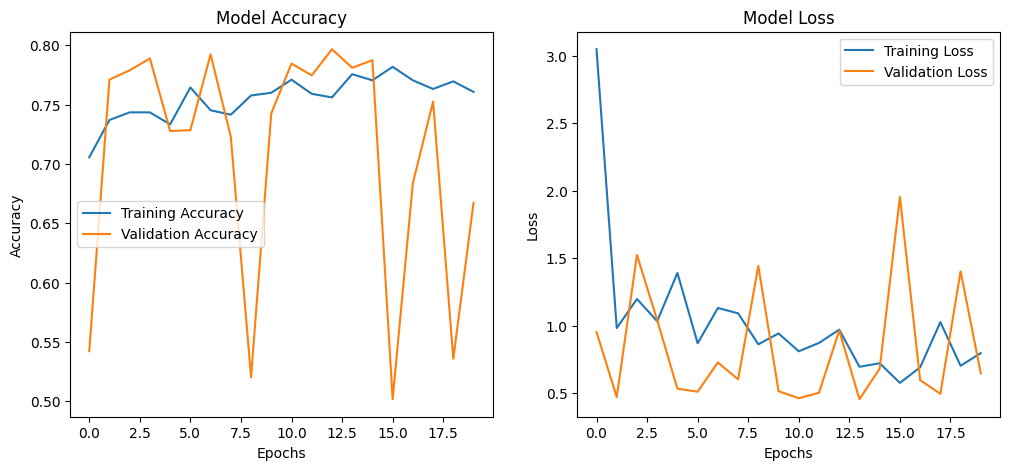

In [9]:
import matplotlib.pyplot as plt

# Get training history
history_dict = history.history

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [11]:
# Convert sample to float32 before passing to the model
sample_data = np.array([X_test.iloc[0].astype(np.float32)])

# Make prediction
prediction = model.predict(sample_data)
print("Churn Probability:", prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Churn Probability: 0.75614285
